# Support Vector Machine Classifier
We decided to implement a Support Vector Machine (SVM) classifier using the scikit-learn library.

## Importing libraries

In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
import statistics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from classification_utils import *
import pickle
from sklearn.metrics import RocCurveDisplay

## Loading data

In [2]:
data = pd.read_csv("dataset/cleaned_user_profiles.csv", index_col=0)

In [3]:
data.head()

,name,lang,bot,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,62.340909,14.015152,0.000000,0.272727,0.098485,0.0,0.0,0.037879,0.190903,0.232481,0.037879,0.190903
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54,69.082645,15.041322,0.000000,0.338843,0.024793,0.0,0.0,0.049587,0.217090,0.284639,0.024793,0.155495
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,53,65.340909,14.694444,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50,86.944871,18.689463,0.022331,0.006281,0.072575,0.0,0.0,0.165387,0.530838,0.669155,0.826239,13.034008
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085,72.311246,14.582073,0.000825,0.506461,0.118229,0.0,0.0,0.056365,0.243387,0.317182,0.016772,0.142619


In [4]:
#a descrption of the dataset
data.describe()

,bot,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
count,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000
mean,0.531456,5148.794751,67.100135,15.045892,0.031045,0.329076,0.088484,0.001967,0.023941,0.084281,0.365536,0.385427,1.357545,14.574041
std,0.499031,18496.606420,12.755296,2.454106,0.053379,0.315589,0.070828,0.007796,0.068508,0.109621,0.408358,0.390777,2.827068,23.390000
min,0.000000,0.000000,32.500000,9.644166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,53.000000,59.686796,13.553296,0.000000,0.010260,0.045455,0.000000,0.000000,0.017751,0.136692,0.119116,0.010526,0.104251
50%,1.000000,57.000000,65.340909,14.694444,0.005109,0.300971,0.070423,0.000000,0.000000,0.045752,0.230747,0.268594,0.043478,0.238606
75%,1.000000,2041.000000,74.254999,16.772205,0.037445,0.450781,0.113295,0.000000,0.000000,0.088862,0.451218,0.491767,0.949402,24.144412
max,1.000000,399555.000000,104.449541,22.000000,0.287760,1.210354,0.337268,0.044444,0.333767,0.529903,2.183383,1.723913,12.902439,198.461303


In [5]:
#check if there is any null value
data.isnull().values.any()

False

In the following plot we can notice that the **Lang** feature is not well distribuited among all the possible languages, so we are going to make an analysis with and without the considered feature.

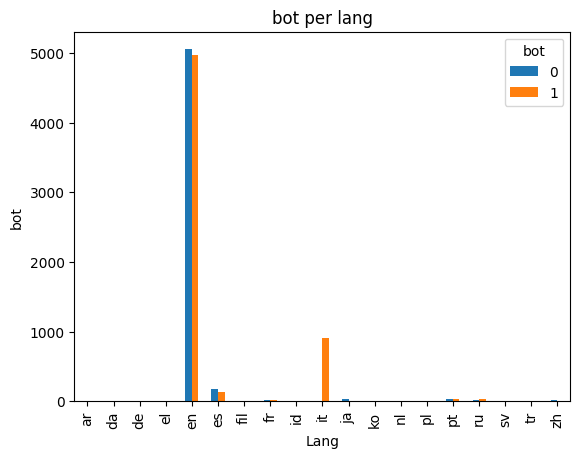

In [6]:
plot_lang_hist(data)

Here we apply the One-Hot Encoding on the **Lang** feature

In [7]:
data = data.join(pd.get_dummies(data["lang"]))

We create the training and test set using a function available in _classification_utils.py_.

In [8]:
train_set, test_set, train_label, test_label = prepare_data(data)

Classification features : ['created_at', 'statuses_count', 'avg_length', 'avg_special_chars', 'urls_ratio', 'mentions_ratio', 'hashtags_ratio', 'reply_count_mean', 'reply_count_std', 'favorite_count_mean', 'favorite_count_std', 'favorite_count_entropy', 'retweet_count_mean', 'retweet_count_std', 'ar', 'da', 'de', 'el', 'en', 'es', 'fil', 'fr', 'id', 'it', 'ja', 'ko', 'nl', 'pl', 'pt', 'ru', 'sv', 'tr', 'zh']


In [9]:
train_set.head()

,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,...,it,ja,ko,nl,pl,pt,ru,sv,tr,zh
1176233665,1518715513,53,71.105263,16.421053,0.052632,0.000000,0.157895,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
1176223429,1518715392,53,59.750000,14.458333,0.000000,0.000000,0.166667,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
219379279,1448561366,31342,43.116115,14.694444,0.115673,0.863576,0.029139,0.0,0.0,0.045752,...,0,0,0,0,0,0,0,0,0,0
708035550,1500768660,32744,86.293845,18.488290,0.027505,0.854575,0.047658,0.0,0.0,0.266068,...,0,0,0,0,0,0,0,0,0,0
2361939307,1551318125,36,62.021277,13.436170,0.000000,0.361702,0.031915,0.0,0.0,0.021277,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train_label.head()

1176233665    1
1176223429    1
219379279     0
708035550     0
2361939307    1
Name: bot, dtype: int64

### Usage of Lang
We are going to train the model using also the **Lang** feature.

We apply the standard scaler transformation.

In [11]:
scaler = StandardScaler()

train_X = scaler.fit_transform(train_set.values)
test_X = scaler.transform(test_set.values)

The parameters we are going to apply the grid search on are:
1. **Kernel**
2. **C** (the regularization parameter)

In [12]:
# make grid search

parameters = {
    'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 
    'C':[0.001, 0.1, 1, 10],
}

svc = SVC(probability=True)

grid_search = GridSearchCV(svc, parameters)

grid_search.fit(train_X, train_label)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.001, 0.1, 1, 10],
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [13]:
clf = grid_search.best_estimator_

In [14]:
clf

SVC(C=10, kernel='linear', probability=True)

In [15]:
# predict on the test set
train_pred = clf.predict(train_X)
test_pred = clf.predict(test_X)

#### Printing metrics

In [16]:
print_metrics(train_label, train_pred, test_label, test_pred)

Accuracy train set  0.8399751707014277
Accuracy test set  0.8488271068635969
Precision train set  0.8651946520338247
Recall train set  0.8399751707014277
F1 score train set  0.8354705305139043
Support train set  (array([0.96379246, 0.77827381]), array([0.68415474, 0.97734174]), array([0.80024795, 0.86652169]), array([3774, 4281]))


In [17]:
#compute the performance of the model
report_scores(test_label,test_pred)

              precision    recall  f1-score   support

        <=50       0.97      0.70      0.81      1618
         >50       0.79      0.98      0.87      1835

    accuracy                           0.85      3453
   macro avg       0.88      0.84      0.84      3453
weighted avg       0.87      0.85      0.84      3453



In [18]:
# cross validation
scores = cross_validate(clf, train_X, train_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  32.30433050791422
Score time  0.10708077748616536
Test score  0.8378646803227808
Train score  0.839292364990689


#### Confusion Matrix

/Users/lucamoroni/Desktop/__WorkSpace/__Universita/unipi/DataMining/Data_Mining_22_23/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


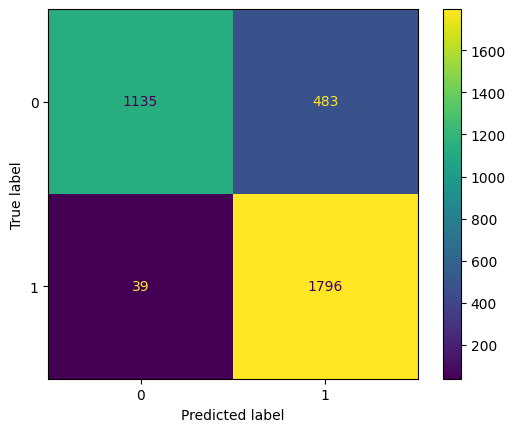

In [19]:
#it is possible to plot the confusion matrix 
#compute confusion matrix
cm = confusion_matrix(test_label, test_pred)
plot_confusion_matrix(clf, test_X, test_label)
plt.show()

#### ROC Curve

In [ ]:
svc_disp = RocCurveDisplay.from_estimator(clf, test_X, test_label)
plt.show()

#### PCA Blobs

In [20]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_X)

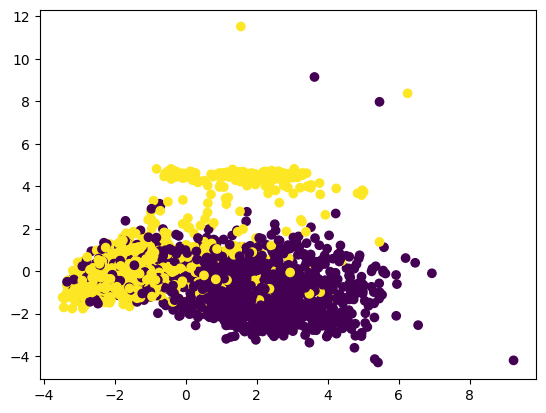

In [21]:
#true labels
from sklearn.datasets import make_blobs
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label);

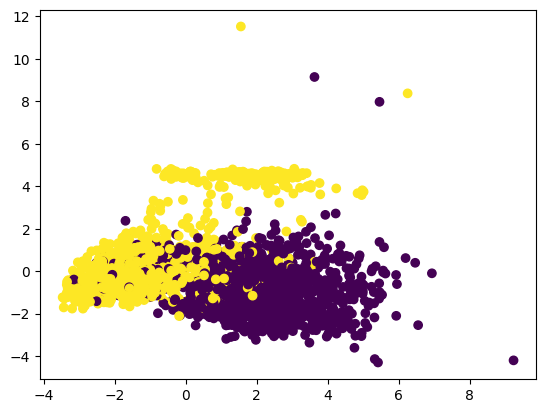

In [22]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred);

#### Saving the model

In [23]:
with open("models_checkpoints/svm_lang.bin", "wb") as f:
    pickle.dump(clf, f)

### No Usage of language

In [11]:
train_set.head()

,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,...,it,ja,ko,nl,pl,pt,ru,sv,tr,zh
1176233665,1518715513,53,71.105263,16.421053,0.052632,0.000000,0.157895,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
1176223429,1518715392,53,59.750000,14.458333,0.000000,0.000000,0.166667,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
219379279,1448561366,31342,43.116115,14.694444,0.115673,0.863576,0.029139,0.0,0.0,0.045752,...,0,0,0,0,0,0,0,0,0,0
708035550,1500768660,32744,86.293845,18.488290,0.027505,0.854575,0.047658,0.0,0.0,0.266068,...,0,0,0,0,0,0,0,0,0,0
2361939307,1551318125,36,62.021277,13.436170,0.000000,0.361702,0.031915,0.0,0.0,0.021277,...,0,0,0,0,0,0,0,0,0,0


We delete the language feature on both training and test set.

In [12]:
for lang in data.lang.unique():
    del train_set[lang]
    del test_set[lang]

In [13]:
train_set.head()

,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
1176233665,1518715513,53,71.105263,16.421053,0.052632,0.000000,0.157895,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1176223429,1518715392,53,59.750000,14.458333,0.000000,0.000000,0.166667,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
219379279,1448561366,31342,43.116115,14.694444,0.115673,0.863576,0.029139,0.0,0.0,0.045752,1.718212,1.441130,11.212804,55.564275
708035550,1500768660,32744,86.293845,18.488290,0.027505,0.854575,0.047658,0.0,0.0,0.266068,0.688185,0.919397,0.043478,71.781333
2361939307,1551318125,36,62.021277,13.436170,0.000000,0.361702,0.031915,0.0,0.0,0.021277,0.144305,0.148549,0.042553,0.201848


We scale the data using the standard scaler transformation.

In [14]:
scaler = StandardScaler()

train_X = scaler.fit_transform(train_set.values)
test_X = scaler.transform(test_set.values)

The parameters we are going to apply the grid search on are:
1. **Kernel**
2. **C** (the regularization parameter)

In [40]:
# make grid search

parameters = {
    'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 
    'C':[0.001, 0.1, 1, 10],
}

svc = SVC(probability=True)

grid_search = GridSearchCV(svc, parameters)


grid_search.fit(train_X, train_label)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.001, 0.1, 1, 10],
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [41]:
clf = grid_search.best_estimator_

In [42]:
clf

SVC(C=10, kernel='linear', probability=True)

In [43]:
#predict on the test set
train_pred = clf.predict(train_X)
test_pred = clf.predict(test_X)

#### Printing metrics

In [44]:
print_metrics(train_label, train_pred, test_label, test_pred)

Accuracy train set  0.843699565487275
Accuracy test set  0.8404286128004633
Precision train set  0.8702900596361524
Recall train set  0.843699565487275
F1 score train set  0.8391729788263502
Support train set  (array([0.9725667 , 0.78012607]), array([0.68574457, 0.98294791]), array([0.8043512, 0.8698708]), array([3774, 4281]))


In [45]:
#compute the performance of the model
report_scores(test_label,test_pred)

              precision    recall  f1-score   support

        <=50       0.98      0.68      0.80      1618
         >50       0.78      0.98      0.87      1835

    accuracy                           0.84      3453
   macro avg       0.88      0.83      0.83      3453
weighted avg       0.87      0.84      0.84      3453



In [46]:
# cross validation
scores = cross_validate(clf, train_X, train_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  12.183113733927408
Score time  0.09917330741882324
Test score  0.8428305400372439
Train score  0.8420856610800745


#### Confusion Matrix

/Users/lucamoroni/Desktop/__WorkSpace/__Universita/unipi/DataMining/Data_Mining_22_23/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


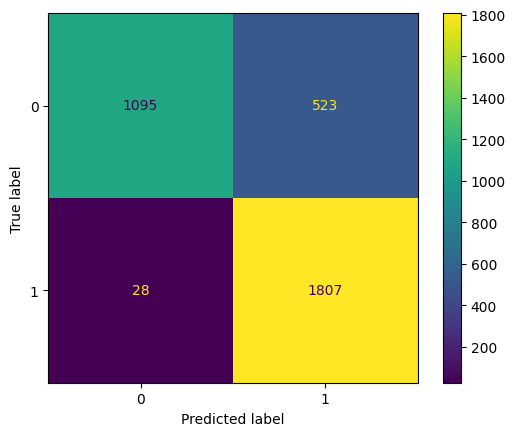

In [47]:
#it is possible to plot the confusion matrix 
#compute confusion matrix
cm = confusion_matrix(test_label, test_pred)
plot_confusion_matrix(clf, test_X, test_label)
plt.show() 

#### ROC curve

In [ ]:
svc_disp = RocCurveDisplay.from_estimator(clf, test_X, test_label)
plt.show()

#### PCA Blobs

In [48]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_X)

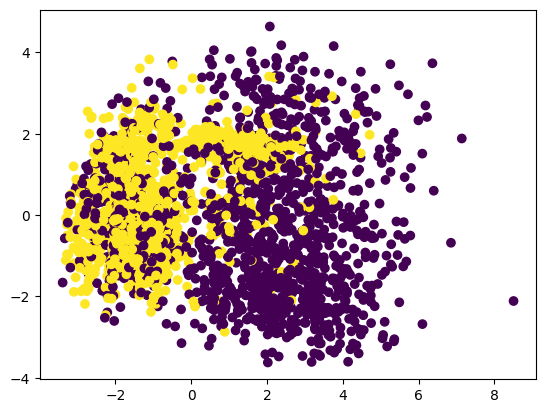

In [49]:
#true labels
from sklearn.datasets import make_blobs
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label);

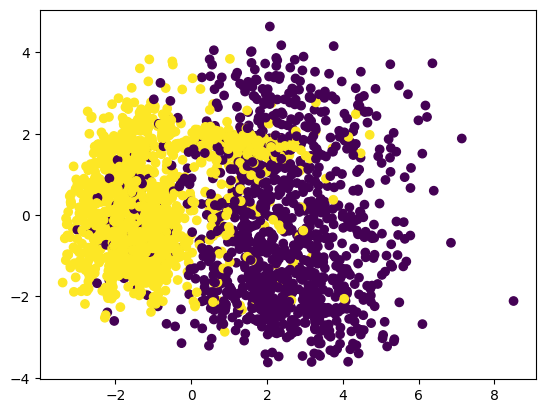

In [50]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred);

#### Saving the model

In [51]:
with open("models_checkpoints/svm_no_lang.bin", "wb") as f:
    pickle.dump(clf, f)